In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
import matplotlib.patches as patches
from dataset_tio import SimImage, MRBrainS18Image, HCPImage, OASISImage, perc_norm
    # calculate_overlap, sim_data, MRBrainS18_data, HCP_data, OASIS_data, perc_norm
import torchio as tio
import nibabel as nib
print(os.getcwd())

/mnt/beta/djboonstoppel/Code


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
Sim = SimImage(number = 100206,
               middle_slices=None,
               data_resolution='1mm_07mm')
sim_LR = Sim.subject()['LR'][tio.DATA][0,20:300,10:290,100]
sim_HR = Sim.subject()['HR'][tio.DATA][0,20:300,10:290,100]
sim_diff = (Sim.subject()['LR'][tio.DATA] - Sim.subject()['HR'][tio.DATA])[0,20:300,10:290,100]
# plt.imshow(sim_LR)

In [4]:
HCP = HCPImage(number = 120010,
               middle_slices=None)
# plt.imshow(HCP.subject()['HR'][tio.DATA][0,30:290,25:285,100])
HCP_LR = HCP.subject()['LR'][tio.DATA][0,30:290,25:285,100]
HCP_HR = HCP.subject()['HR'][tio.DATA][0,30:290,25:285,100]
HCP_diff = (HCP.subject()['LR'][tio.DATA] - HCP.subject()['HR'][tio.DATA])[0,30:290,25:285,100]
# plt.imshow(HCP_LR)

In [5]:
def load_result(folder, source, no, exp_name):
    root = '/mnt/beta/djboonstoppel/Code'

    if source == 'sim':
        img_fname = "08-Apr-2022_Ernst_labels_{:06d}_3T_T1w_MPR1_img_act_1_contrast_1_SR_".format(no)+exp_name+'.nii.gz'
    elif source == 'hcp':
        img_fname = "{:06d}_3T_T1w_MPR1_img_SR_".format(no)+exp_name+'.nii.gz'
    elif source == 'oasis':
        img_fname = "OAS1_{:04d}_MR1_mpr_n4_anon_111_t88_masked_gfc_SR_".format(no)+exp_name+'.nii.gz'
    elif source == 'mrbrains':
        img_fname = "p{:01d}_reg_T1_SR_".format(no)+exp_name+'.nii.gz'
    else:
        raise ValueError("Dataset '{}' not implemented".format(source))

    path = os.path.join(root, 'output', folder, source, exp_name, 'test', img_fname)
    nifty = nib.load(path)
    array = nifty.get_fdata()
    array_norm, _ = perc_norm(array)
    return array_norm

def load_result_1(folder, source, no, exp_name):
    root = '/mnt/beta/djboonstoppel/Code'

    if source == 'sim':
        img_fname = "08-Apr-2022_Ernst_labels_{:06d}_3T_T1w_MPR1_img_act_1_contrast_1_SR.nii.gz".format(no)
    elif source == 'hcp':
        img_fname = "{:06d}_3T_T1w_MPR1_img_SR.nii.gz".format(no)
    elif source == 'oasis':
        img_fname = "OAS1_{:04d}_MR1_mpr_n4_anon_111_t88_masked_gfc_SR.nii.gz".format(no)
    elif source == 'mrbrains':
        img_fname = "p{:01d}_reg_T1_SR.nii.gz".format(no)
    else:
        raise ValueError("Dataset '{}' not implemented".format(source))

    path = os.path.join(root, 'output', folder, source, exp_name, 'test', img_fname)
    nifty = nib.load(path)
    array = nifty.get_fdata()
    array_norm, _ = perc_norm(array)
    return array_norm

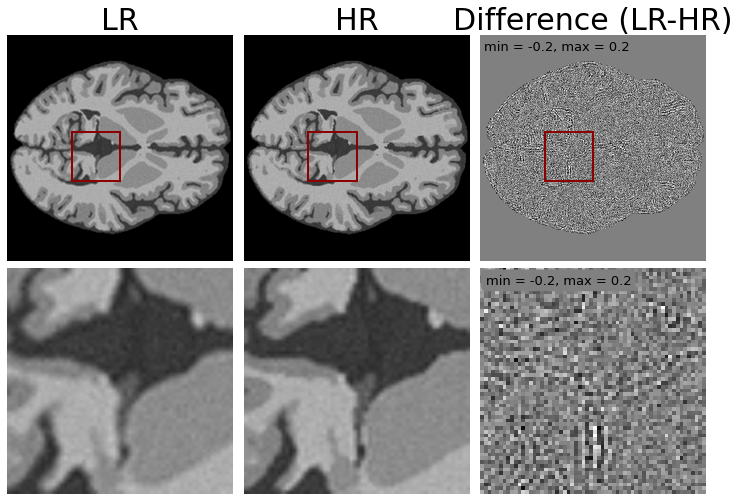

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 7.1))
# fig.set_facecolor('white')
# fig.suptitle('Simulated data', fontsize=16)
for axis in axes:
    for xs in axis:
        xs.set_axis_off()
x1, x2, y1, y2 = 80, 140, 120, 180
rect0 = patches.Rectangle((x1, y1), (x2-x1), (y2-y1), linewidth=2, edgecolor='darkred', facecolor='none')
rect1 = patches.Rectangle((x1, y1), (x2-x1), (y2-y1), linewidth=2, edgecolor='darkred', facecolor='none')
rect2 = patches.Rectangle((x1, y1), (x2-x1), (y2-y1), linewidth=2, edgecolor='darkred', facecolor='none')

axes[0,0].set_title('LR', fontsize=30)
axes[0,0].imshow(sim_LR, interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,0].imshow(sim_LR[y1:y2,x1:x2], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[0,0].add_patch(rect0)
axes[0,1].set_title('HR', fontsize=30)
axes[0,1].imshow(sim_HR, interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,1].imshow(sim_HR[y1:y2,x1:x2], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[0,1].add_patch(rect1)
axes[0,2].set_title('Difference (LR-HR)', fontsize=30)
axes[0,2].imshow(sim_diff, interpolation='nearest', cmap='gray', vmin=-0.2, vmax=0.2)
axes[1,2].imshow(sim_diff[y1:y2,x1:x2], interpolation='nearest', cmap='gray', vmin=-0.2, vmax=0.2)
axes[0,2].add_patch(rect2)
axes[0,2].text(5, 5, "min = -0.2, max = 0.2", size=13,
         ha="left", va="top",
         bbox=dict(boxstyle="round",
                   ec=(0.5, 0.5, 0.5),
                   fc=(0.5, 0.5, 0.5),
                   )
         )
axes[1,2].text(1, 1, "min = -0.2, max = 0.2", size=13,
         ha="left", va="top",
         bbox=dict(boxstyle="round",
                   ec=(0.5, 0.5, 0.5),
                   fc=(0.5, 0.5, 0.5),
                   )
         )

plt.tight_layout()
plt.show()
path = 'figs'
name = 'sim_methods'
# fig.savefig(os.path.join(path, 'png', name+'.png'), dpi=300, bbox_inches='tight')
# fig.savefig(os.path.join(path, 'eps', name+'.eps'), format='eps', bbox_inches='tight')

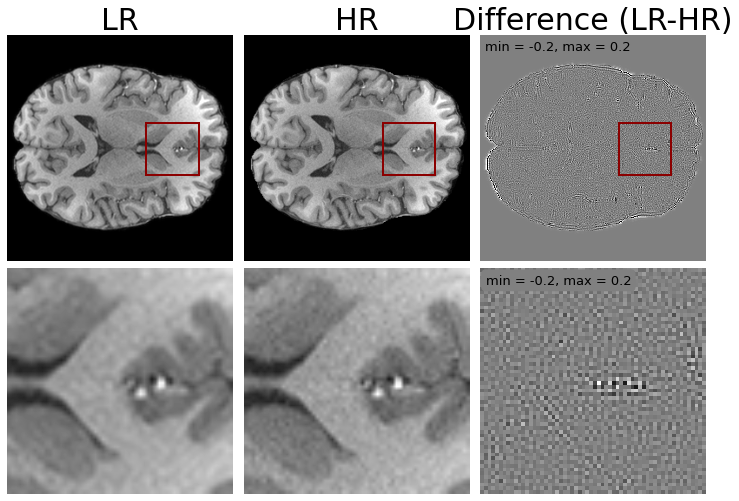

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 7.1))
# fig.set_facecolor('white')
# fig.suptitle('HCP data', fontsize=16)
for axis in axes:
    for xs in axis:
        xs.set_axis_off()
x1, x2, y1, y2 = 160, 220, 100, 160
rect0 = patches.Rectangle((x1, y1), (x2-x1), (y2-y1), linewidth=2, edgecolor='darkred', facecolor='none')
rect1 = patches.Rectangle((x1, y1), (x2-x1), (y2-y1), linewidth=2, edgecolor='darkred', facecolor='none')
rect2 = patches.Rectangle((x1, y1), (x2-x1), (y2-y1), linewidth=2, edgecolor='darkred', facecolor='none')
interpolation = 'bilinear'


axes[0,0].set_title('LR', fontsize=30)
axes[0,0].imshow(HCP_LR, interpolation=interpolation, cmap='gray', vmin=0, vmax=1.5)
axes[1,0].imshow(HCP_LR[y1:y2,x1:x2], interpolation=interpolation, cmap='gray', vmin=0, vmax=1.5)
axes[0,0].add_patch(rect0)
axes[0,1].set_title('HR', fontsize=30)
axes[0,1].imshow(HCP_HR, interpolation=interpolation, cmap='gray', vmin=0, vmax=1.5)
axes[1,1].imshow(HCP_HR[y1:y2,x1:x2], interpolation=interpolation, cmap='gray', vmin=0, vmax=1.5)
axes[0,1].add_patch(rect1)
axes[0,2].set_title('Difference (LR-HR)', fontsize=30)
# diff = HCP.subject()['LR'][tio.DATA] - HCP.subject()['HR'][tio.DATA]
axes[0,2].imshow(HCP_diff, interpolation='nearest', cmap='gray', vmin=-0.2, vmax=0.2)
axes[1,2].imshow(HCP_diff[y1:y2,x1:x2], interpolation='nearest', cmap='gray', vmin=-0.2, vmax=0.2)
axes[0,2].add_patch(rect2)
axes[0,2].text(5, 5, "min = -0.2, max = 0.2", size=13,
         ha="left", va="top",
         bbox=dict(boxstyle="round",
                   ec=(0.5, 0.5, 0.5),
                   fc=(0.5, 0.5, 0.5),
                   )
         )
axes[1,2].text(1, 1, "min = -0.2, max = 0.2", size=13,
         ha="left", va="top",
         bbox=dict(boxstyle="round",
                   ec=(0.5, 0.5, 0.5),
                   fc=(0.5, 0.5, 0.5),
                   )
         )


plt.tight_layout()
plt.show()
path = 'figs'
name = 'hcp_methods'

# fig.savefig(os.path.join(path, 'png', name+'.png'), dpi=300, bbox_inches='tight')
# fig.savefig(os.path.join(path, 'eps', name+'.eps'), format='eps', bbox_inches='tight')

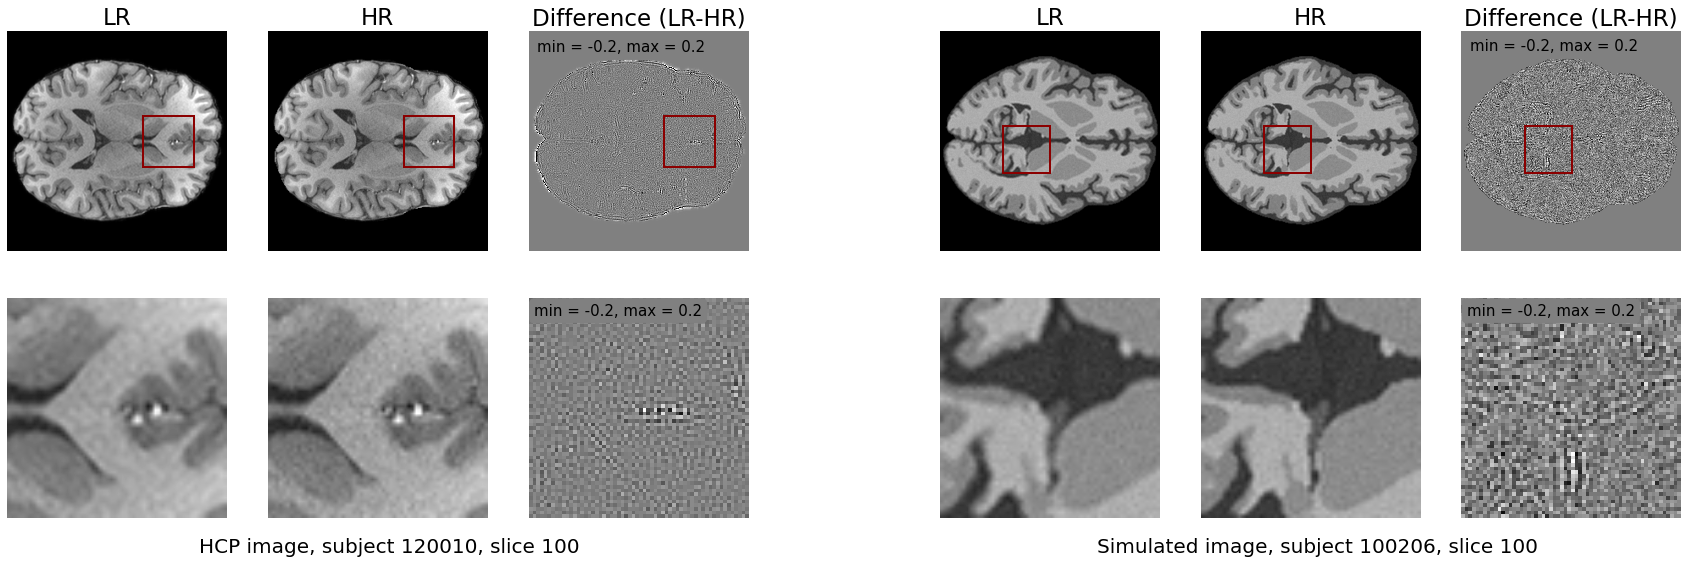

In [73]:
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(30, 9), gridspec_kw={'width_ratios': [1,1,1,0.5,1,1,1]})
# fig.set_facecolor('white')
# fig.suptitle('Simulated data', fontsize=16)
for axis in axes:
    for xs in axis:
        xs.set_axis_off()
x1, x2, y1, y2 = 80, 140, 120, 180
x3, x4, y3, y4 = 160, 220, 100, 160

rect0 = patches.Rectangle((x1, y1), (x2-x1), (y2-y1), linewidth=2, edgecolor='darkred', facecolor='none')
rect1 = patches.Rectangle((x1, y1), (x2-x1), (y2-y1), linewidth=2, edgecolor='darkred', facecolor='none')
rect2 = patches.Rectangle((x1, y1), (x2-x1), (y2-y1), linewidth=2, edgecolor='darkred', facecolor='none')
rect3 = patches.Rectangle((x3, y3), (x4-x3), (y4-y3), linewidth=2, edgecolor='darkred', facecolor='none')
rect4 = patches.Rectangle((x3, y3), (x4-x3), (y4-y3), linewidth=2, edgecolor='darkred', facecolor='none')
rect5 = patches.Rectangle((x3, y3), (x4-x3), (y4-y3), linewidth=2, edgecolor='darkred', facecolor='none')

# axes[1,1].text(30, 70, "HCP image, subject 120010, slice 100", size=40,
#          ha="center", va="top",
#          bbox=dict(boxstyle="round",
                   # ec=(0.5, 0.5, 0.5),
                   # fc=(0, 0, 0),
                   # )
         # )
fontsize = 23
axes[0,4].set_title('LR', fontsize=fontsize)
axes[0,4].imshow(sim_LR, interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,4].imshow(sim_LR[y1:y2,x1:x2], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[0,4].add_patch(rect0)
axes[0,5].set_title('HR', fontsize=fontsize)
axes[0,5].imshow(sim_HR, interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,5].imshow(sim_HR[y1:y2,x1:x2], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[0,5].add_patch(rect1)
axes[0,6].set_title('Difference (LR-HR)', fontsize=fontsize)
axes[0,6].imshow(sim_diff, interpolation='nearest', cmap='gray', vmin=-0.2, vmax=0.2)
axes[1,6].imshow(sim_diff[y1:y2,x1:x2], interpolation='nearest', cmap='gray', vmin=-0.2, vmax=0.2)
axes[0,6].add_patch(rect2)
axes[0,6].text(10, 10, "min = -0.2, max = 0.2", size=15,
         ha="left", va="top",
         bbox=dict(boxstyle="round",
                   ec=(0.5, 0.5, 0.5),
                   fc=(0.5, 0.5, 0.5),
                   )
         )
axes[1,6].text(1, 1, "min = -0.2, max = 0.2", size=15,
         ha="left", va="top",
         bbox=dict(boxstyle="round",
                   ec=(0.5, 0.5, 0.5),
                   fc=(0.5, 0.5, 0.5),
                   )
         )

interpolation = 'bilinear'


axes[0,0].set_title('LR', fontsize=fontsize)
axes[0,0].imshow(HCP_LR, interpolation=interpolation, cmap='gray', vmin=0, vmax=1.5)
axes[1,0].imshow(HCP_LR[y3:y4,x3:x4], interpolation=interpolation, cmap='gray', vmin=0, vmax=1.5)
axes[0,0].add_patch(rect3)
axes[0,1].set_title('HR', fontsize=fontsize)
axes[0,1].imshow(HCP_HR, interpolation=interpolation, cmap='gray', vmin=0, vmax=1.5)
axes[1,1].imshow(HCP_HR[y3:y4,x3:x4], interpolation=interpolation, cmap='gray', vmin=0, vmax=1.5)
axes[0,1].add_patch(rect4)
axes[0,2].set_title('Difference (LR-HR)', fontsize=fontsize)
# diff = HCP.subject()['LR'][tio.DATA] - HCP.subject()['HR'][tio.DATA]
axes[0,2].imshow(HCP_diff, interpolation='nearest', cmap='gray', vmin=-0.2, vmax=0.2)
axes[1,2].imshow(HCP_diff[y3:y4,x3:x4], interpolation='nearest', cmap='gray', vmin=-0.2, vmax=0.2)
axes[0,2].add_patch(rect5)
axes[0,2].text(10, 10, "min = -0.2, max = 0.2", size=15,
         ha="left", va="top",
         bbox=dict(boxstyle="round",
                   ec=(0.5, 0.5, 0.5),
                   fc=(0.5, 0.5, 0.5),
                   )
         )
axes[1,2].text(1, 1, "min = -0.2, max = 0.2", size=15,
         ha="left", va="top",
         bbox=dict(boxstyle="round",
                   ec=(0.5, 0.5, 0.5),
                   fc=(0.5, 0.5, 0.5),
                   )
         )

plt.text(-345, 65, 'HCP image, subject 120010, slice 100',
         fontsize=20, ha="left", va="top")#, transform=plt.gcf().transFigure)
plt.text(-100, 65, 'Simulated image, subject 100206, slice 100',
         fontsize=20, ha="left", va="top")#, transform=plt.gcf().transFigure)

# plt.tight_layout()
path = 'figs'
name = 'images_abstract'

fig.savefig(os.path.join(path, 'png', name+'.png'), dpi=100, bbox_inches='tight')
fig.savefig(os.path.join(path, 'eps', name+'.eps'), format='eps', bbox_inches='tight')
plt.show()


In [133]:
Sim = SimImage(number = 100307,
               middle_slices=None,
               data_resolution='1mm_07mm')
sim_LR = Sim.subject()['LR'][tio.DATA][0,30:290,20:280,108]
sim_HR = Sim.subject()['HR'][tio.DATA][0,30:290,20:280,108]

folder = 'losses-final'
source = 'sim'
no = 100307

alpha_pixel = 0.7
alpha_edge = 0.3
alpha_perceptual = 0
alpha_adversarial = 0
exp_name = 'px{}_edge{}_vgg{}_gan{}'.format(alpha_pixel,
                                            alpha_edge,
                                            alpha_perceptual,
                                            alpha_adversarial).replace('.', '')
base = load_result(folder, source, no, exp_name)[30:290,20:280,108]

alpha_pixel = 0.7
alpha_edge = 0.3
alpha_perceptual = 1
alpha_adversarial = 0
exp_name = 'px{}_edge{}_vgg{}_gan{}'.format(alpha_pixel,
                                            alpha_edge,
                                            alpha_perceptual,
                                            alpha_adversarial).replace('.', '')
vgg = load_result(folder, source, no, exp_name)[30:290,20:280,108]

folder = 'exp1-losses'
alpha_pixel = 0.7
alpha_edge = 0.3
alpha_perceptual = 0
alpha_adversarial = 0.1
mode = 'vanilla'
ragan = 'True'
exp_name = 'px={}_edge={}_vgg={}_gan={}_mode={}_ragan={}'.format(
    alpha_pixel,
    alpha_edge,
    alpha_perceptual,
    alpha_adversarial,
    mode,
    ragan
).replace('.', '')
rasgan = load_result_1(folder, source, no, exp_name)[30:290,20:280,108]

alpha_pixel = 0.7
alpha_edge = 0.3
alpha_perceptual = 0
alpha_adversarial = 0.01
mode = 'wgan'
ragan = 'False'
exp_name = 'px={}_edge={}_vgg={}_gan={}_mode={}_ragan={}'.format(
    alpha_pixel,
    alpha_edge,
    alpha_perceptual,
    alpha_adversarial,
    mode,
    ragan
).replace('.', '')
wgan = load_result_1(folder, source, no, exp_name)[30:290,20:280,108]

alpha_pixel = 0.7
alpha_edge = 0.3
alpha_perceptual = 1
alpha_adversarial = 0.1
mode = 'vanilla'
ragan = 'True'
exp_name = 'px={}_edge={}_vgg={}_gan={}_mode={}_ragan={}'.format(
    alpha_pixel,
    alpha_edge,
    alpha_perceptual,
    alpha_adversarial,
    mode,
    ragan
).replace('.', '')
perc_rasgan = load_result_1(folder, source, no, exp_name)[30:290,20:280,108]

alpha_pixel = 0.7
alpha_edge = 0.3
alpha_perceptual = 1
alpha_adversarial = 0.01
mode = 'wgan'
ragan = 'False'
exp_name = 'px={}_edge={}_vgg={}_gan={}_mode={}_ragan={}'.format(
    alpha_pixel,
    alpha_edge,
    alpha_perceptual,
    alpha_adversarial,
    mode,
    ragan
).replace('.', '')
perc_wgan = load_result_1(folder, source, no, exp_name)[30:290,20:280,108]

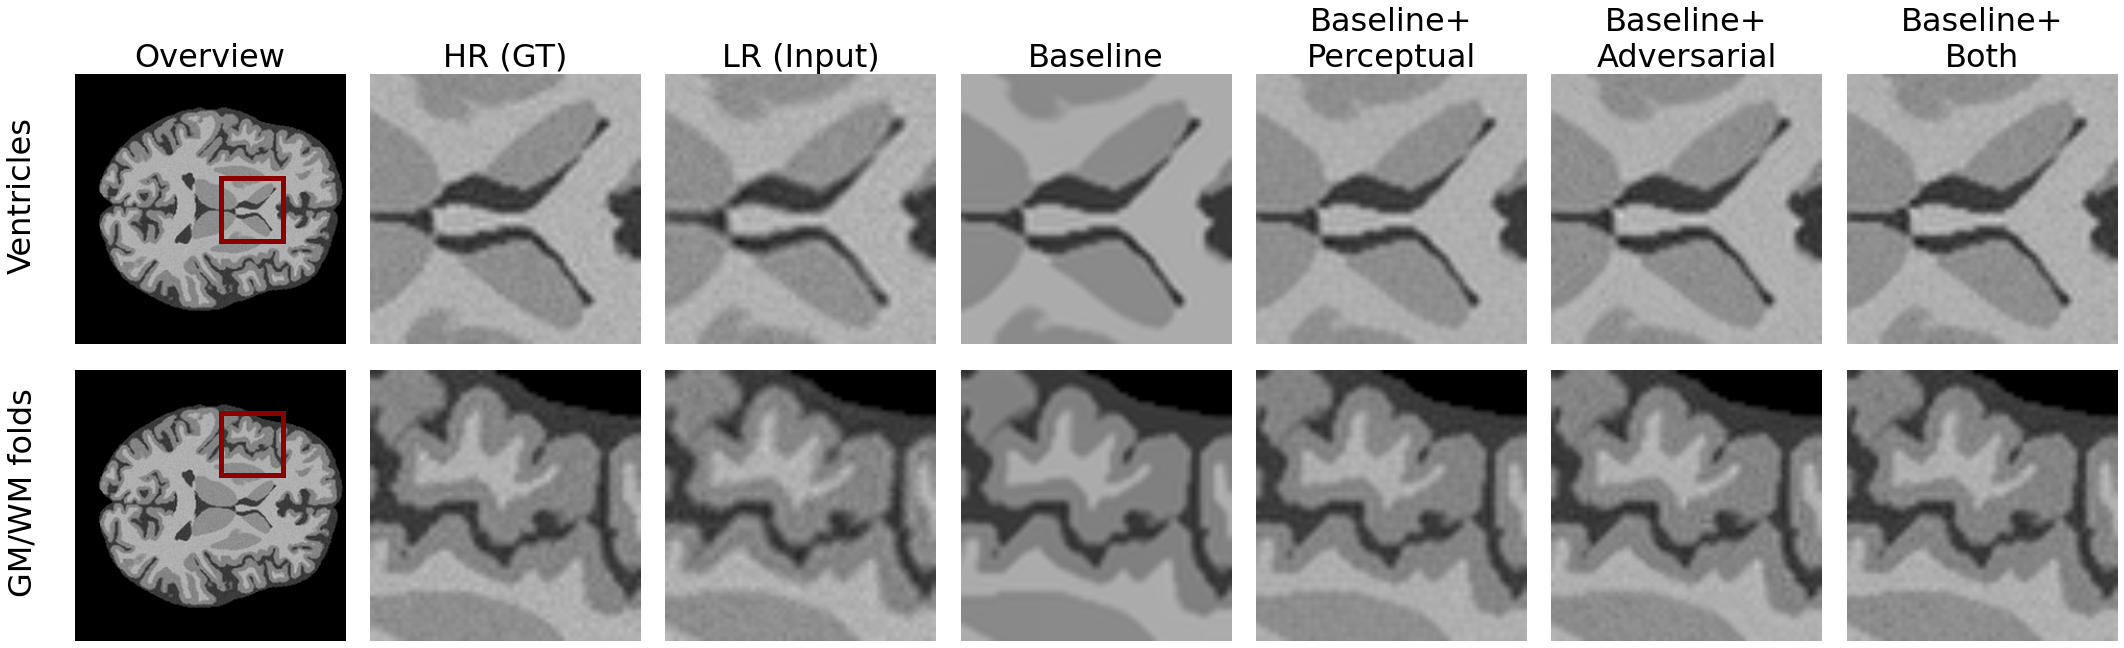

In [52]:
fig, axes = plt.subplots(nrows=2, ncols=8, figsize=(30, 9.8), gridspec_kw={'width_ratios': [0.1, 1, 1, 1, 1, 1, 1, 1]})
# fig.set_facecolor('white')
for axis in axes:
    for xs in axis:
        xs.set_axis_off()

fontsize = 32

x1, x2, y1, y2 = 140, 200, 100, 160
x3, x4, y3, y4 = 140, 200, 40, 100
rect0 = patches.Rectangle((x1, y1), 60, 60, linewidth=5, edgecolor='darkred', facecolor='none')
rect1 = patches.Rectangle((x3, y3), 60, 60, linewidth=5, edgecolor='darkred', facecolor='none')
axes[0,0].imshow(np.ones((100,100)),cmap='gray', vmin=0, vmax=1, alpha=0)
axes[1,0].imshow(np.ones((100,100)),cmap='gray', vmin=0, vmax=1, alpha=0)
axes[0,0].text(0, 0, "Ventricles", size=fontsize,
         ha="center", va="center", rotation='vertical'
               )
axes[1,0].text(0, 0, "GM/WM folds", size=fontsize,
         ha="center", va="center", rotation='vertical'
               )

axes[0,1].set_title('Overview', fontsize=fontsize)
axes[0,1].imshow(sim_HR, interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,1].imshow(sim_HR, interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[0,1].add_patch(rect0)
axes[1,1].add_patch(rect1)

axes[0,2].set_title('HR (GT)', fontsize=fontsize)
axes[0,2].imshow(sim_HR[y1:y2,x1:x2], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,2].imshow(sim_HR[y3:y4,x3:x4], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)

axes[0,3].set_title('LR (Input)', fontsize=fontsize)
axes[0,3].imshow(sim_LR[y1:y2,x1:x2], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,3].imshow(sim_LR[y3:y4,x3:x4], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)

axes[0,4].set_title('Baseline', fontsize=fontsize)
axes[0,4].imshow(base[y1:y2,x1:x2], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,4].imshow(base[y3:y4,x3:x4], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)

axes[0,5].set_title('Baseline+\nPerceptual', fontsize=fontsize)
axes[0,5].imshow(vgg[y1:y2,x1:x2], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,5].imshow(vgg[y3:y4,x3:x4], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)

axes[0,6].set_title('Baseline+\nAdversarial', fontsize=fontsize)
axes[0,6].imshow(gan[y1:y2,x1:x2], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,6].imshow(gan[y3:y4,x3:x4], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)

axes[0,7].set_title('Baseline+\nBoth', fontsize=fontsize)
axes[0,7].imshow(total[y1:y2,x1:x2], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,7].imshow(total[y3:y4,x3:x4], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)

plt.tight_layout(pad=2.5)
path = 'figs'
name = 'results_exp1_lowres'
# fig.savefig(os.path.join(path, 'png', name+'.png'), dpi=10, bbox_inches='tight')
# fig.savefig(os.path.join(path, 'eps', name+'.eps'), format='eps', bbox_inches='tight')
plt.show()

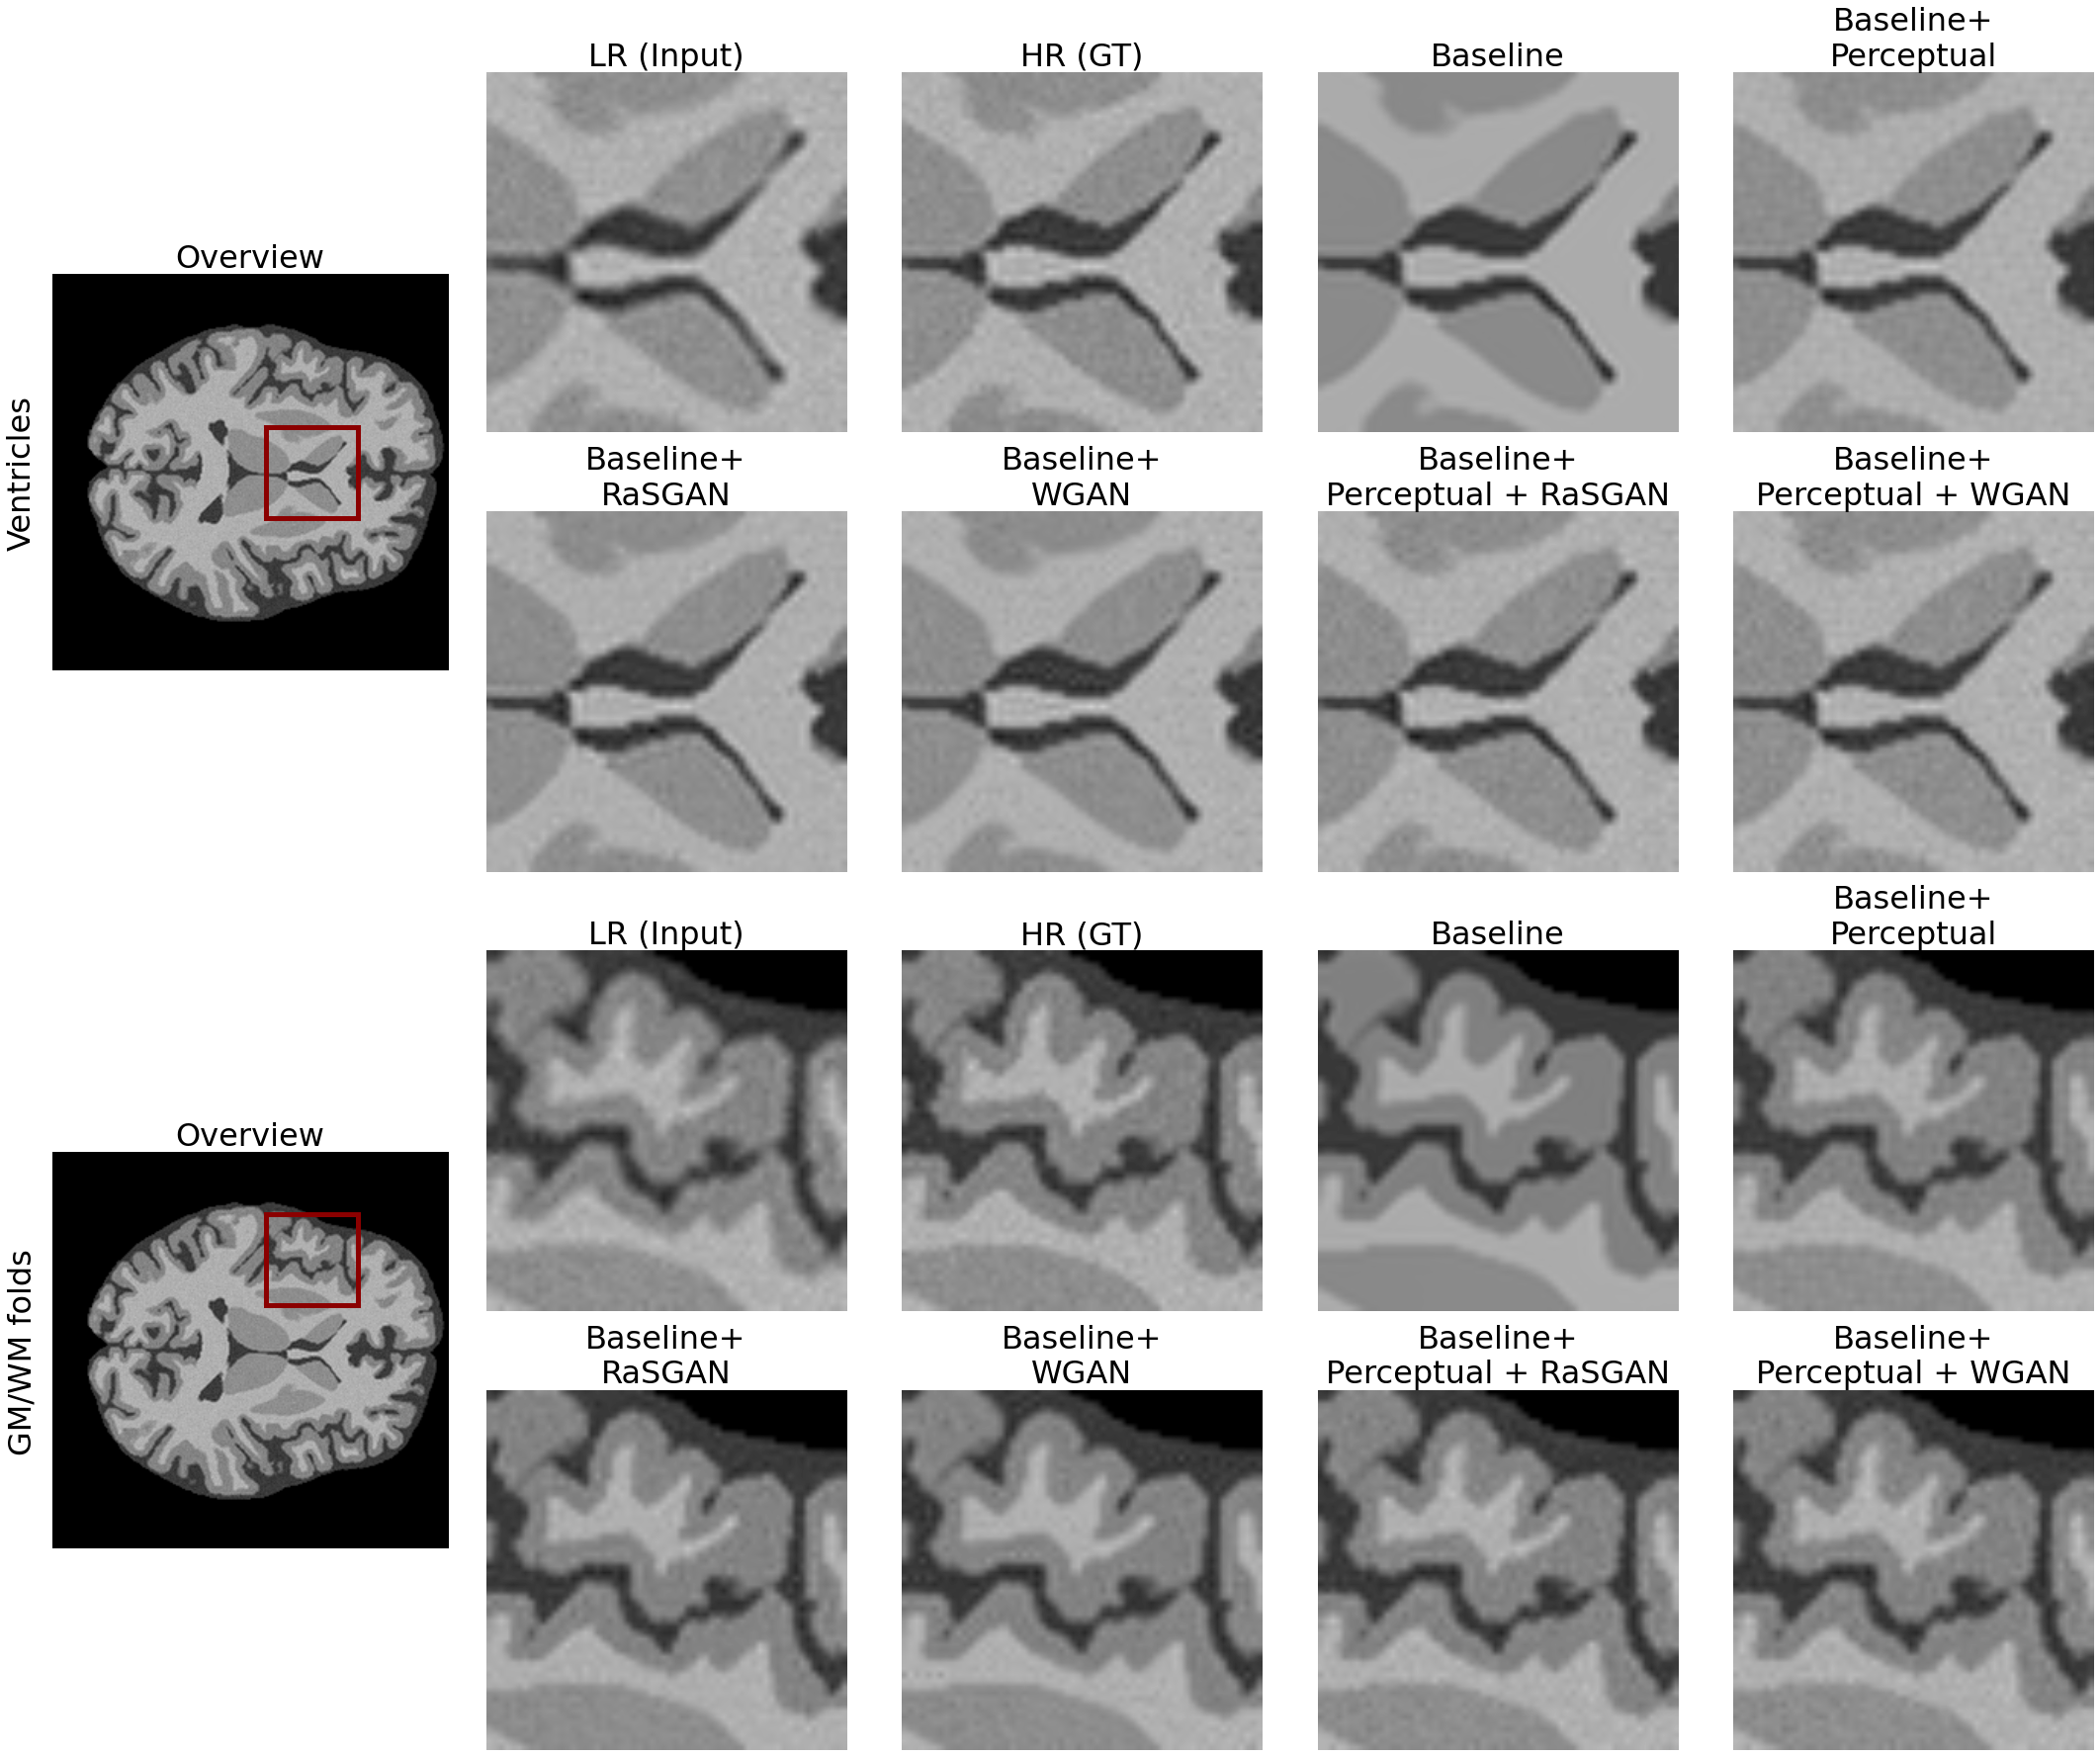

In [138]:
fig = plt.figure(figsize=(30, 25))
# fig.set_facecolor('white')

#overview
ax1 = plt.subplot2grid((4,5), (0,0), rowspan=2)
ax2 = plt.subplot2grid((4,5), (2,0), rowspan=2)

#top zooms
ax11 = plt.subplot2grid((4,5), (0,1))
ax12 = plt.subplot2grid((4,5), (0,2))
ax13 = plt.subplot2grid((4,5), (0,3))
ax14 = plt.subplot2grid((4,5), (0,4))
ax21 = plt.subplot2grid((4,5), (1,1))
ax22 = plt.subplot2grid((4,5), (1,2))
ax23 = plt.subplot2grid((4,5), (1,3))
ax24 = plt.subplot2grid((4,5), (1,4))

#bottom zooms
ax31 = plt.subplot2grid((4,5), (2,1))
ax32 = plt.subplot2grid((4,5), (2,2))
ax33 = plt.subplot2grid((4,5), (2,3))
ax34 = plt.subplot2grid((4,5), (2,4))
ax41 = plt.subplot2grid((4,5), (3,1))
ax42 = plt.subplot2grid((4,5), (3,2))
ax43 = plt.subplot2grid((4,5), (3,3))
ax44 = plt.subplot2grid((4,5), (3,4))

ax1.text(-20, 130, "Ventricles", size=fontsize,
         ha="center", va="center", rotation='vertical'
               )
ax2.text(-20, 130, "GM/WM folds", size=fontsize,
         ha="center", va="center", rotation='vertical'
               )

x1, x2, y1, y2 = 140, 200, 100, 160
x3, x4, y3, y4 = 140, 200, 40, 100
rect0 = patches.Rectangle((x1, y1), 60, 60, linewidth=5, edgecolor='darkred', facecolor='none')
rect1 = patches.Rectangle((x3, y3), 60, 60, linewidth=5, edgecolor='darkred', facecolor='none')

ax1.set_title('Overview', fontsize=fontsize)
ax1.imshow(sim_HR, interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
ax1.add_patch(rect0)
ax2.set_title('Overview', fontsize=fontsize)
ax2.imshow(sim_HR, interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
ax2.add_patch(rect1)

ax12.set_title('HR (GT)', fontsize=fontsize)
ax12.imshow(sim_HR[y1:y2,x1:x2], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
ax32.set_title('HR (GT)', fontsize=fontsize)
ax32.imshow(sim_HR[y3:y4,x3:x4], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)

ax11.set_title('LR (Input)', fontsize=fontsize)
ax11.imshow(sim_LR[y1:y2,x1:x2], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
ax31.set_title('LR (Input)', fontsize=fontsize)
ax31.imshow(sim_LR[y3:y4,x3:x4], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)

ax13.set_title('Baseline', fontsize=fontsize)
ax13.imshow(base[y1:y2,x1:x2], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
ax33.set_title('Baseline', fontsize=fontsize)
ax33.imshow(base[y3:y4,x3:x4], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)

ax14.set_title('Baseline+\nPerceptual', fontsize=fontsize)
ax14.imshow(vgg[y1:y2,x1:x2], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
ax34.set_title('Baseline+\nPerceptual', fontsize=fontsize)
ax34.imshow(vgg[y3:y4,x3:x4], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)

ax21.set_title('Baseline+\nRaSGAN', fontsize=fontsize)
ax21.imshow(rasgan[y1:y2,x1:x2], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
ax41.set_title('Baseline+\nRaSGAN', fontsize=fontsize)
ax41.imshow(rasgan[y3:y4,x3:x4], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)

ax22.set_title('Baseline+\nWGAN', fontsize=fontsize)
ax22.imshow(wgan[y1:y2,x1:x2], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
ax42.set_title('Baseline+\nWGAN', fontsize=fontsize)
ax42.imshow(wgan[y3:y4,x3:x4], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)

ax23.set_title('Baseline+\nPerceptual + RaSGAN', fontsize=fontsize)
ax23.imshow(perc_rasgan[y1:y2,x1:x2], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
ax43.set_title('Baseline+\nPerceptual + RaSGAN', fontsize=fontsize)
ax43.imshow(perc_rasgan[y3:y4,x3:x4], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)

ax24.set_title('Baseline+\nPerceptual + WGAN', fontsize=fontsize)
ax24.imshow(perc_wgan[y1:y2,x1:x2], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
ax44.set_title('Baseline+\nPerceptual + WGAN', fontsize=fontsize)
ax44.imshow(perc_wgan[y3:y4,x3:x4], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)

for ax in [ax1,ax2,ax11,ax12,ax13,ax14,ax21,ax22,ax23,ax24,ax31,ax32,ax33,ax34,ax41,ax42,ax43,ax44]:
    ax.set_axis_off()

plt.tight_layout(pad=2)

save_path = 'figs'
fig_name = 'results_exp1_new'
fig.savefig(os.path.join(save_path, 'png', fig_name+'.png'), dpi=300, bbox_inches='tight')
fig.savefig(os.path.join(save_path, 'eps', fig_name+'.eps'), format='eps', bbox_inches='tight')

plt.show()

In [42]:
Sim = SimImage(number = 100307,
               middle_slices=None,
               data_resolution='1mm_07mm')
sim_LR = Sim.subject()['LR'][tio.DATA][0,30:290,20:280,108]
sim_HR = Sim.subject()['HR'][tio.DATA][0,30:290,20:280,108]

HCP = HCPImage(number = 121416,
               middle_slices=None)
hcp_LR = HCP.subject()['LR'][tio.DATA][0,30:290,25:285,110]
hcp_HR = HCP.subject()['HR'][tio.DATA][0,30:290,25:285,110]

mrbrains = MRBrainS18Image(number = 4,
                           middle_slices=None)
mrbrains_lr = mrbrains.subject()['LR'][tio.DATA][0,25:205,30:220,24]
mrbrains_lr = np.fliplr(mrbrains_lr)

oasis = OASISImage(number = 16,
                   middle_slices=None)
oasis_lr = oasis.subject()['LR'][tio.DATA][0,:,15:190,90]

In [68]:
folder = 'data-final'

source = 'sim'
no = 100307
nr_sim = 0
nr_hcp = 30
name = 'sim={}_hcp={}'.format(nr_sim, nr_hcp)
sim_hcp = load_result(folder, source, no, name)[30:290,20:280,108]
nr_sim = 30
nr_hcp = 0
name = 'sim={}_hcp={}'.format(nr_sim, nr_hcp)
sim_sim = load_result(folder, source, no, name)[30:290,20:280,108]
nr_sim = 30
nr_hcp = 30
name = 'sim={}_hcp={}'.format(nr_sim, nr_hcp)
sim_mix = load_result(folder, source, no, name)[30:290,20:280,108]

source = 'hcp'
no = 121416
nr_sim = 0
nr_hcp = 30
name = 'sim={}_hcp={}'.format(nr_sim, nr_hcp)
hcp_hcp = load_result(folder, source, no, name)[30:290,25:285,110]
nr_sim = 30
nr_hcp = 0
name = 'sim={}_hcp={}'.format(nr_sim, nr_hcp)
hcp_sim = load_result(folder, source, no, name)[30:290,25:285,110]
nr_sim = 30
nr_hcp = 30
name = 'sim={}_hcp={}'.format(nr_sim, nr_hcp)
hcp_mix = load_result(folder, source, no, name)[30:290,25:285,110]


source = 'mrbrains'
no = 4
nr_sim = 0
nr_hcp = 30
name = 'sim={}_hcp={}'.format(nr_sim, nr_hcp)
mrbrains_hcp = load_result(folder, source, no, name)[25:205,30:220,24]
mrbrains_hcp = np.fliplr(mrbrains_hcp)

nr_sim = 30
nr_hcp = 0
name = 'sim={}_hcp={}'.format(nr_sim, nr_hcp)
mrbrains_sim = load_result(folder, source, no, name)[25:205,30:220,24]
mrbrains_sim = np.fliplr(mrbrains_sim)

nr_sim = 30
nr_hcp = 30
name = 'sim={}_hcp={}'.format(nr_sim, nr_hcp)
mrbrains_mix = load_result(folder, source, no, name)[25:205,30:220,24]
mrbrains_mix = np.fliplr(mrbrains_mix)

source = 'oasis'
no = 16
nr_sim = 0
nr_hcp = 30
name = 'sim={}_hcp={}'.format(nr_sim, nr_hcp)
oasis_hcp = load_result(folder, source, no, name)[:,15:190,90]
nr_sim = 30
nr_hcp = 0
name = 'sim={}_hcp={}'.format(nr_sim, nr_hcp)
oasis_sim = load_result(folder, source, no, name)[:,15:190,90]
nr_sim = 30
nr_hcp = 30
name = 'sim={}_hcp={}'.format(nr_sim, nr_hcp)
oasis_mix = load_result(folder, source, no, name)[:,15:190,90]

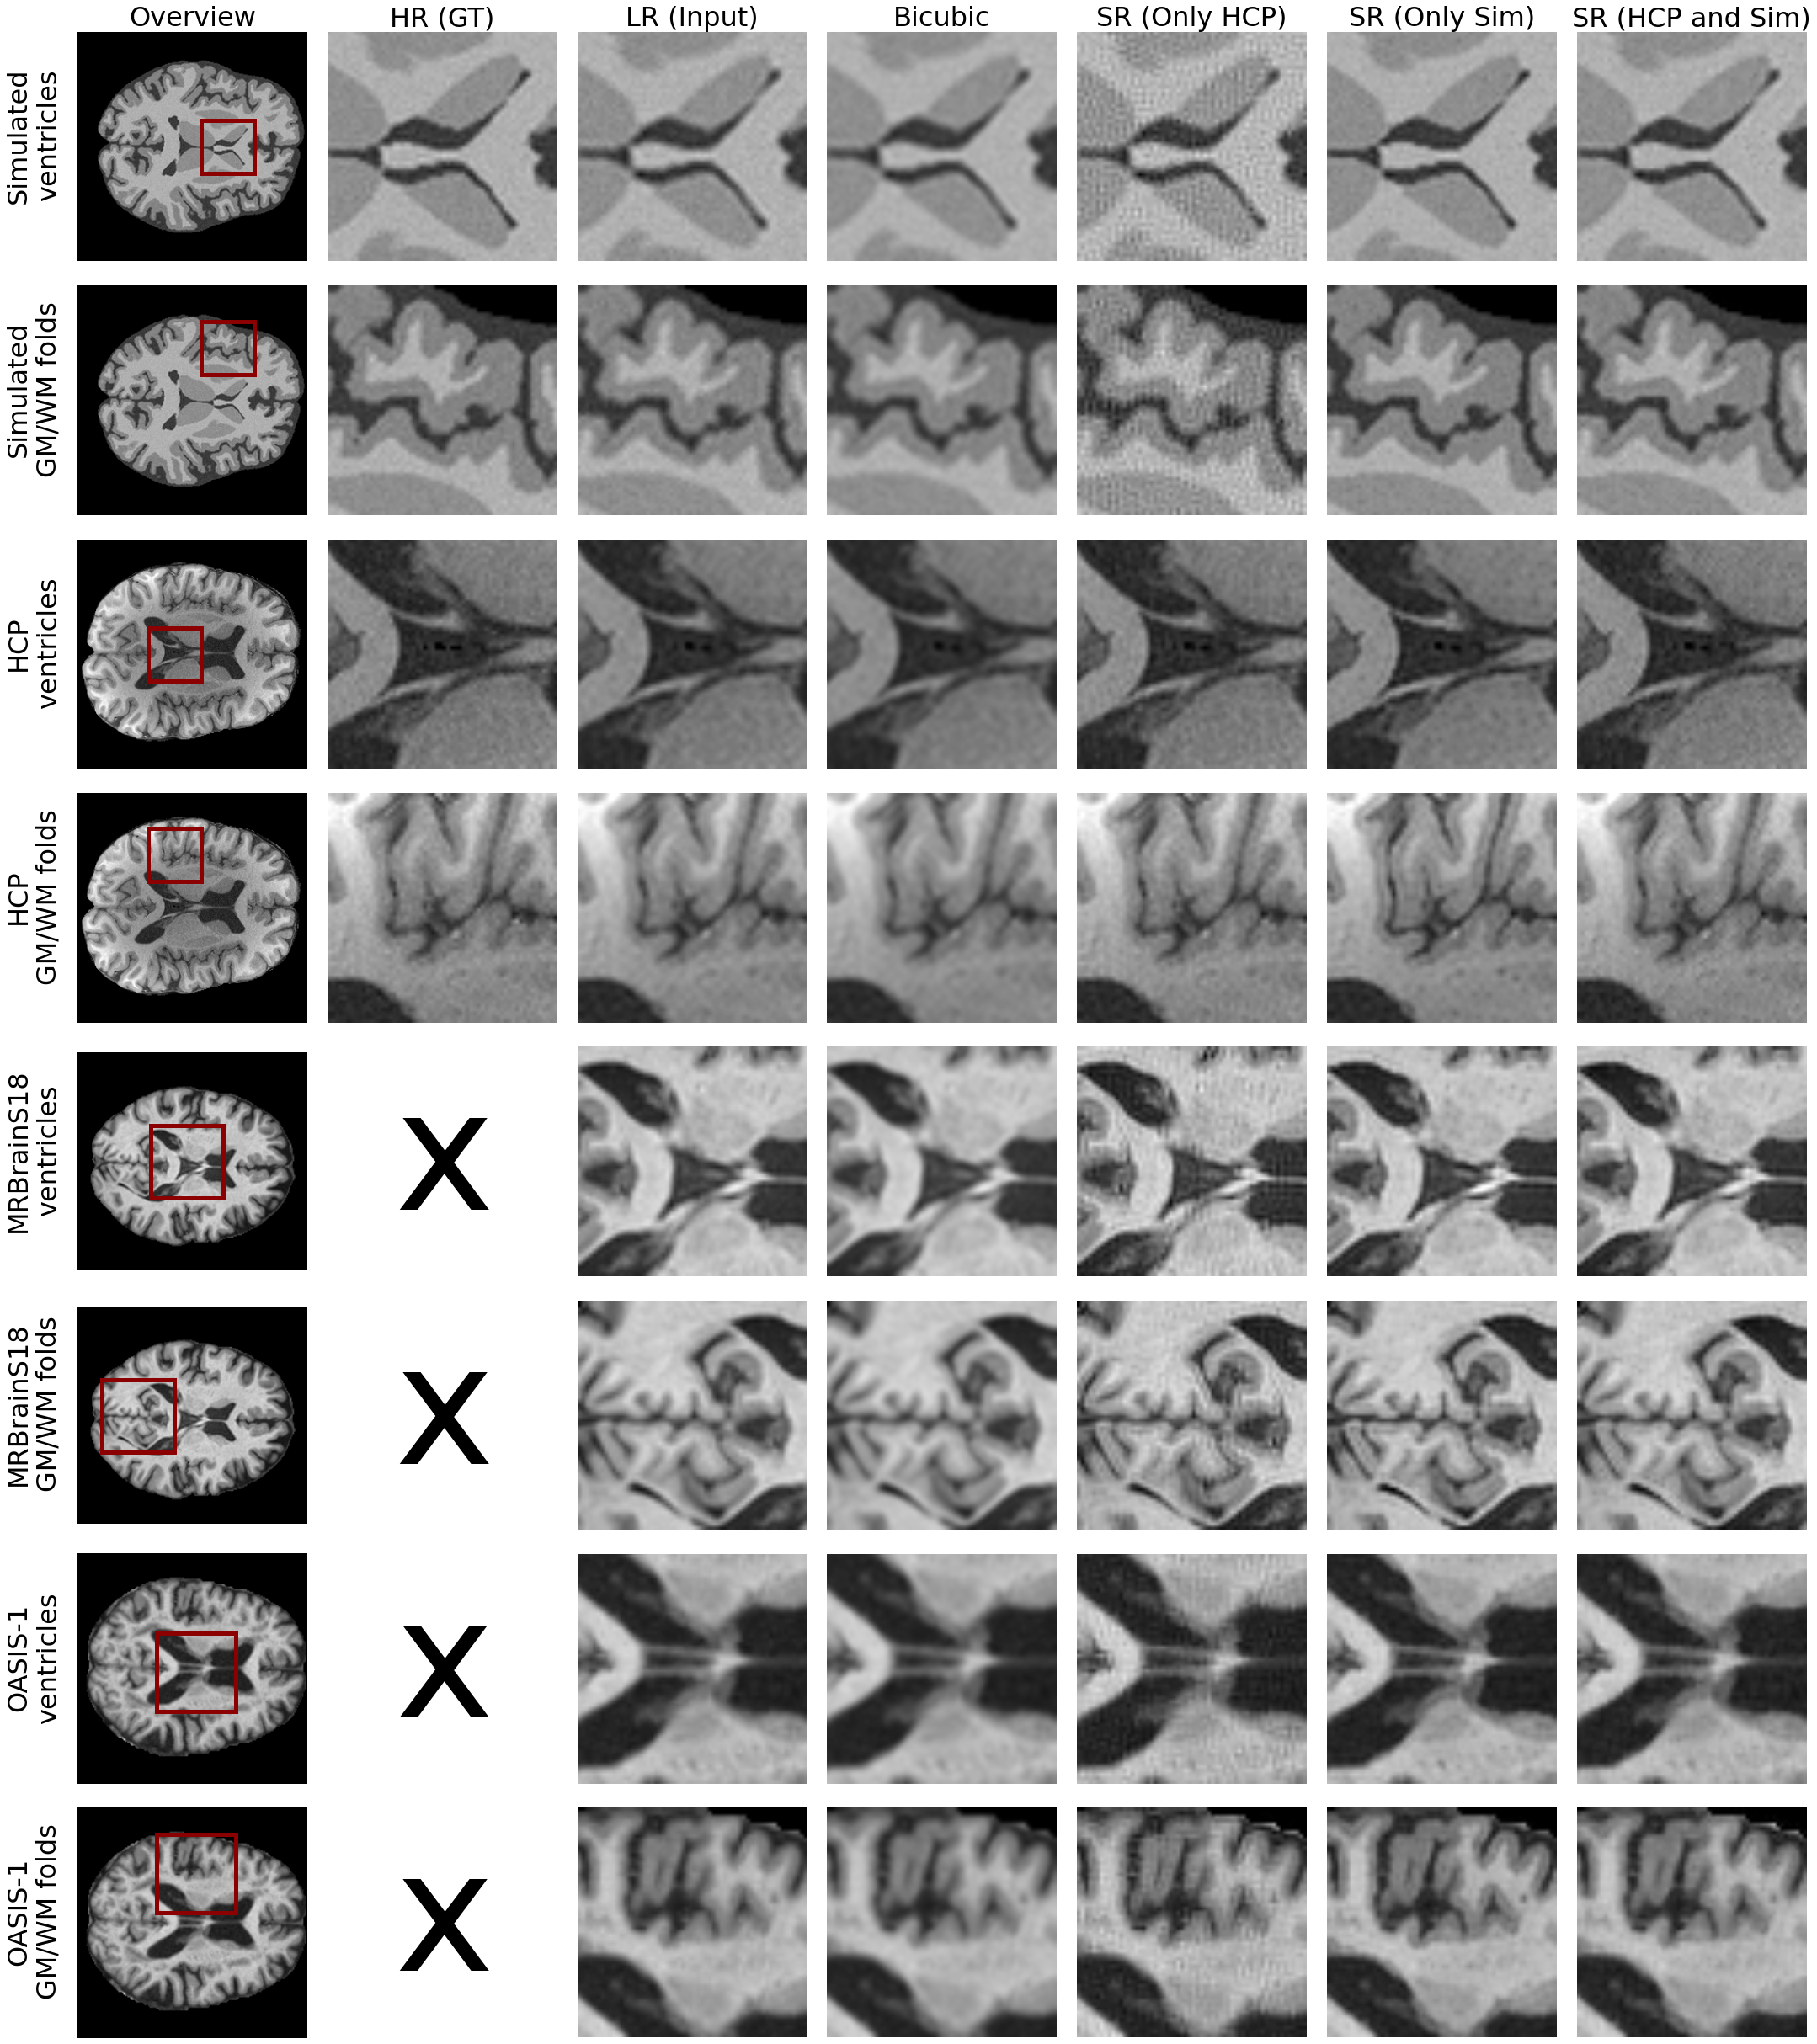

In [160]:
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(30, 34), gridspec_kw={'width_ratios': [0.1, 1, 1, 1, 1, 1, 1, 1]})
# fig.set_facecolor('white')
for axis in axes:
    for xs in axis:
        xs.set_axis_off()

fontsize = 32

x1_sim, x2_sim, y1_sim, y2_sim = 140, 200, 100, 160
x3_sim, x4_sim, y3_sim, y4_sim = 140, 200, 40, 100
x1_hcp, x2_hcp, y1_hcp, y2_hcp = 80, 140, 100, 160
x3_hcp, x4_hcp, y3_hcp, y4_hcp = 80, 140, 40, 100
x1_mrb, x2_mrb, y1_mrb, y2_mrb = 60, 120, 60, 120
x3_mrb, x4_mrb, y3_mrb, y4_mrb = 20, 80, 60, 120
x1_oas, x2_oas, y1_oas, y2_oas = 60, 120, 60, 120
x3_oas, x4_oas, y3_oas, y4_oas = 60, 120, 20, 80
rect0 = patches.Rectangle((x1_sim, y1_sim), 60, 60, linewidth=5, edgecolor='darkred', facecolor='none')
rect1 = patches.Rectangle((x3_sim, y3_sim), 60, 60, linewidth=5, edgecolor='darkred', facecolor='none')
rect2 = patches.Rectangle((x1_hcp, y1_hcp), 60, 60, linewidth=5, edgecolor='darkred', facecolor='none')
rect3 = patches.Rectangle((x3_hcp, y3_hcp), 60, 60, linewidth=5, edgecolor='darkred', facecolor='none')
rect4 = patches.Rectangle((x1_mrb, y1_mrb), 60, 60, linewidth=5, edgecolor='darkred', facecolor='none')
rect5 = patches.Rectangle((x3_mrb, y3_mrb), 60, 60, linewidth=5, edgecolor='darkred', facecolor='none')
rect6 = patches.Rectangle((x1_oas, y1_oas), 60, 60, linewidth=5, edgecolor='darkred', facecolor='none')
rect7 = patches.Rectangle((x3_oas, y3_oas), 60, 60, linewidth=5, edgecolor='darkred', facecolor='none')
axes[0,0].imshow(np.ones((100,100)),cmap='gray', vmin=0, vmax=1, alpha=0)
axes[1,0].imshow(np.ones((100,100)),cmap='gray', vmin=0, vmax=1, alpha=0)
axes[2,0].imshow(np.ones((100,100)),cmap='gray', vmin=0, vmax=1, alpha=0)
axes[3,0].imshow(np.ones((100,100)),cmap='gray', vmin=0, vmax=1, alpha=0)
axes[4,0].imshow(np.ones((100,100)),cmap='gray', vmin=0, vmax=1, alpha=0)
axes[5,0].imshow(np.ones((100,100)),cmap='gray', vmin=0, vmax=1, alpha=0)
axes[6,0].imshow(np.ones((100,100)),cmap='gray', vmin=0, vmax=1, alpha=0)
axes[7,0].imshow(np.ones((100,100)),cmap='gray', vmin=0, vmax=1, alpha=0)

axes[0,1].set_title('Overview', fontsize=fontsize)
axes[0,1].set_ylabel('Simulated', fontsize=fontsize)
axes[0,1].imshow(sim_HR, interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,1].imshow(sim_HR, interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[2,1].set_ylabel('HCP', fontsize=fontsize)
axes[2,1].imshow(hcp_HR, interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[3,1].imshow(hcp_HR, interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[4,1].set_ylabel('MRBrainS18', fontsize=fontsize)
axes[4,1].imshow(mrbrains_lr, interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[5,1].imshow(mrbrains_lr, interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[6,1].set_ylabel('OASISImage', fontsize=fontsize)
axes[6,1].imshow(oasis_lr, interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[7,1].imshow(oasis_lr, interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[0,1].add_patch(rect0)
axes[1,1].add_patch(rect1)
axes[2,1].add_patch(rect2)
axes[3,1].add_patch(rect3)
axes[4,1].add_patch(rect4)
axes[5,1].add_patch(rect5)
axes[6,1].add_patch(rect6)
axes[7,1].add_patch(rect7)

axes[0,2].set_title('HR (GT)', fontsize=fontsize)
axes[0,2].imshow(sim_HR[y1_sim:y2_sim,x1_sim:x2_sim], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,2].imshow(sim_HR[y3_sim:y4_sim,x3_sim:x4_sim], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[2,2].imshow(hcp_HR[y1_hcp:y2_hcp,x1_hcp:x2_hcp], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[3,2].imshow(hcp_HR[y3_hcp:y4_hcp,x3_hcp:x4_hcp], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[4,2].imshow(np.ones((y2_hcp-y1_hcp,x2_hcp-x1_hcp)), interpolation='bilinear', cmap='gray', vmin=0, vmax=1, alpha=0)
axes[5,2].imshow(np.ones((y2_hcp-y1_hcp,x2_hcp-x1_hcp)), interpolation='bilinear', cmap='gray', vmin=0, vmax=1, alpha=0)
axes[6,2].imshow(np.ones((y2_hcp-y1_hcp,x2_hcp-x1_hcp)), interpolation='bilinear', cmap='gray', vmin=0, vmax=1, alpha=0)
axes[7,2].imshow(np.ones((y2_hcp-y1_hcp,x2_hcp-x1_hcp)), interpolation='bilinear', cmap='gray', vmin=0, vmax=1, alpha=0)

axes[0,3].set_title('LR (Input)', fontsize=fontsize)
axes[0,3].imshow(sim_LR[y1_sim:y2_sim,x1_sim:x2_sim], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,3].imshow(sim_LR[y3_sim:y4_sim,x3_sim:x4_sim], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[2,3].imshow(hcp_LR[y1_hcp:y2_hcp,x1_hcp:x2_hcp], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[3,3].imshow(hcp_LR[y3_hcp:y4_hcp,x3_hcp:x4_hcp], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[4,3].imshow(mrbrains_lr[y1_mrb:y2_mrb,x1_mrb:x2_mrb], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[5,3].imshow(mrbrains_lr[y3_mrb:y4_mrb,x3_mrb:x4_mrb], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[6,3].imshow(oasis_lr[y1_oas:y2_oas,x1_oas:x2_oas], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[7,3].imshow(oasis_lr[y3_oas:y4_oas,x3_oas:x4_oas], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)

axes[0,4].set_title('Bicubic', fontsize=fontsize)
axes[0,4].imshow(sim_LR[y1_sim:y2_sim,x1_sim:x2_sim], interpolation='bicubic', cmap='gray', vmin=0, vmax=1.5)
axes[1,4].imshow(sim_LR[y3_sim:y4_sim,x3_sim:x4_sim], interpolation='bicubic', cmap='gray', vmin=0, vmax=1.5)
axes[2,4].imshow(hcp_LR[y1_hcp:y2_hcp,x1_hcp:x2_hcp], interpolation='bicubic', cmap='gray', vmin=0, vmax=1.5)
axes[3,4].imshow(hcp_LR[y3_hcp:y4_hcp,x3_hcp:x4_hcp], interpolation='bicubic', cmap='gray', vmin=0, vmax=1.5)
axes[4,4].imshow(mrbrains_lr[y1_mrb:y2_mrb,x1_mrb:x2_mrb], interpolation='bicubic', cmap='gray', vmin=0, vmax=1.5)
axes[5,4].imshow(mrbrains_lr[y3_mrb:y4_mrb,x3_mrb:x4_mrb], interpolation='bicubic', cmap='gray', vmin=0, vmax=1.5)
axes[6,4].imshow(oasis_lr[y1_oas:y2_oas,x1_oas:x2_oas], interpolation='bicubic', cmap='gray', vmin=0, vmax=1.5)
axes[7,4].imshow(oasis_lr[y3_oas:y4_oas,x3_oas:x4_oas], interpolation='bicubic', cmap='gray', vmin=0, vmax=1.5)

axes[0,5].set_title('SR (Only HCP)', fontsize=fontsize)
axes[0,5].imshow(sim_hcp[y1_sim:y2_sim,x1_sim:x2_sim], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,5].imshow(sim_hcp[y3_sim:y4_sim,x3_sim:x4_sim], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[2,5].imshow(hcp_hcp[y1_hcp:y2_hcp,x1_hcp:x2_hcp], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[3,5].imshow(hcp_hcp[y3_hcp:y4_hcp,x3_hcp:x4_hcp], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[4,5].imshow(mrbrains_hcp[y1_mrb:y2_mrb,x1_mrb:x2_mrb], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[5,5].imshow(mrbrains_hcp[y3_mrb:y4_mrb,x3_mrb:x4_mrb], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[6,5].imshow(oasis_hcp[y1_oas:y2_oas,x1_oas:x2_oas], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[7,5].imshow(oasis_hcp[y3_oas:y4_oas,x3_oas:x4_oas], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)

axes[0,6].set_title('SR (Only Sim)', fontsize=fontsize)
axes[0,6].imshow(sim_sim[y1_sim:y2_sim,x1_sim:x2_sim], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,6].imshow(sim_sim[y3_sim:y4_sim,x3_sim:x4_sim], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[2,6].imshow(hcp_sim[y1_hcp:y2_hcp,x1_hcp:x2_hcp], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[3,6].imshow(hcp_sim[y3_hcp:y4_hcp,x3_hcp:x4_hcp], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[4,6].imshow(mrbrains_sim[y1_mrb:y2_mrb,x1_mrb:x2_mrb], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[5,6].imshow(mrbrains_sim[y3_mrb:y4_mrb,x3_mrb:x4_mrb], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[6,6].imshow(oasis_sim[y1_oas:y2_oas,x1_oas:x2_oas], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[7,6].imshow(oasis_sim[y3_oas:y4_oas,x3_oas:x4_oas], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)

axes[0,7].set_title('SR (HCP and Sim)', fontsize=fontsize)
axes[0,7].imshow(sim_mix[y1_sim:y2_sim,x1_sim:x2_sim], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,7].imshow(sim_mix[y3_sim:y4_sim,x3_sim:x4_sim], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[2,7].imshow(hcp_mix[y1_hcp:y2_hcp,x1_hcp:x2_hcp], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[3,7].imshow(hcp_mix[y3_hcp:y4_hcp,x3_hcp:x4_hcp], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[4,7].imshow(mrbrains_mix[y1_mrb:y2_mrb,x1_mrb:x2_mrb], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[5,7].imshow(mrbrains_mix[y3_mrb:y4_mrb,x3_mrb:x4_mrb], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[6,7].imshow(oasis_mix[y1_oas:y2_oas,x1_oas:x2_oas], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[7,7].imshow(oasis_mix[y3_oas:y4_oas,x3_oas:x4_oas], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)

axes[4,2].text(30, 30, "x", size=200,
         ha="center", va="center", fontweight='ultralight',
               )
axes[5,2].text(30, 30, "x", size=200,
         ha="center", va="center", fontweight='ultralight',
               )
axes[6,2].text(30, 30, "x", size=200,
         ha="center", va="center", fontweight='ultralight',
               )
axes[7,2].text(30, 30, "x", size=200,
         ha="center", va="center", fontweight='ultralight',
               )

axes[0,0].text(0, 0, "Simulated\nventricles", size=fontsize,
         ha="center", va="center", rotation='vertical'
               )
axes[1,0].text(0, 0, "Simulated\nGM/WM folds", size=fontsize,
         ha="center", va="center", rotation='vertical'
               )
axes[2,0].text(0, 0, "HCP\nventricles", size=fontsize,
         ha="center", va="center", rotation='vertical'
               )
axes[3,0].text(0, 0, "HCP\nGM/WM folds", size=fontsize,
         ha="center", va="center", rotation='vertical'
               )
axes[4,0].text(0, 0, "MRBrainS18\nventricles", size=fontsize,
         ha="center", va="center", rotation='vertical'
               )
axes[5,0].text(0, 0, "MRBrainS18\nGM/WM folds", size=fontsize,
         ha="center", va="center", rotation='vertical'
               )
axes[6,0].text(0, 0, "OASIS-1\nventricles", size=fontsize,
         ha="center", va="center", rotation='vertical'
               )
axes[7,0].text(0, 0, "OASIS-1\nGM/WM folds", size=fontsize,
         ha="center", va="center", rotation='vertical'
               )
plt.tight_layout()
path = 'figs'
name = 'results_exp2_lowres'
fig.savefig(os.path.join(path, 'png', name+'.png'), dpi=10, bbox_inches='tight')
# fig.savefig(os.path.join(path, 'eps', name+'.eps'), format='eps', bbox_inches='tight')
plt.show()

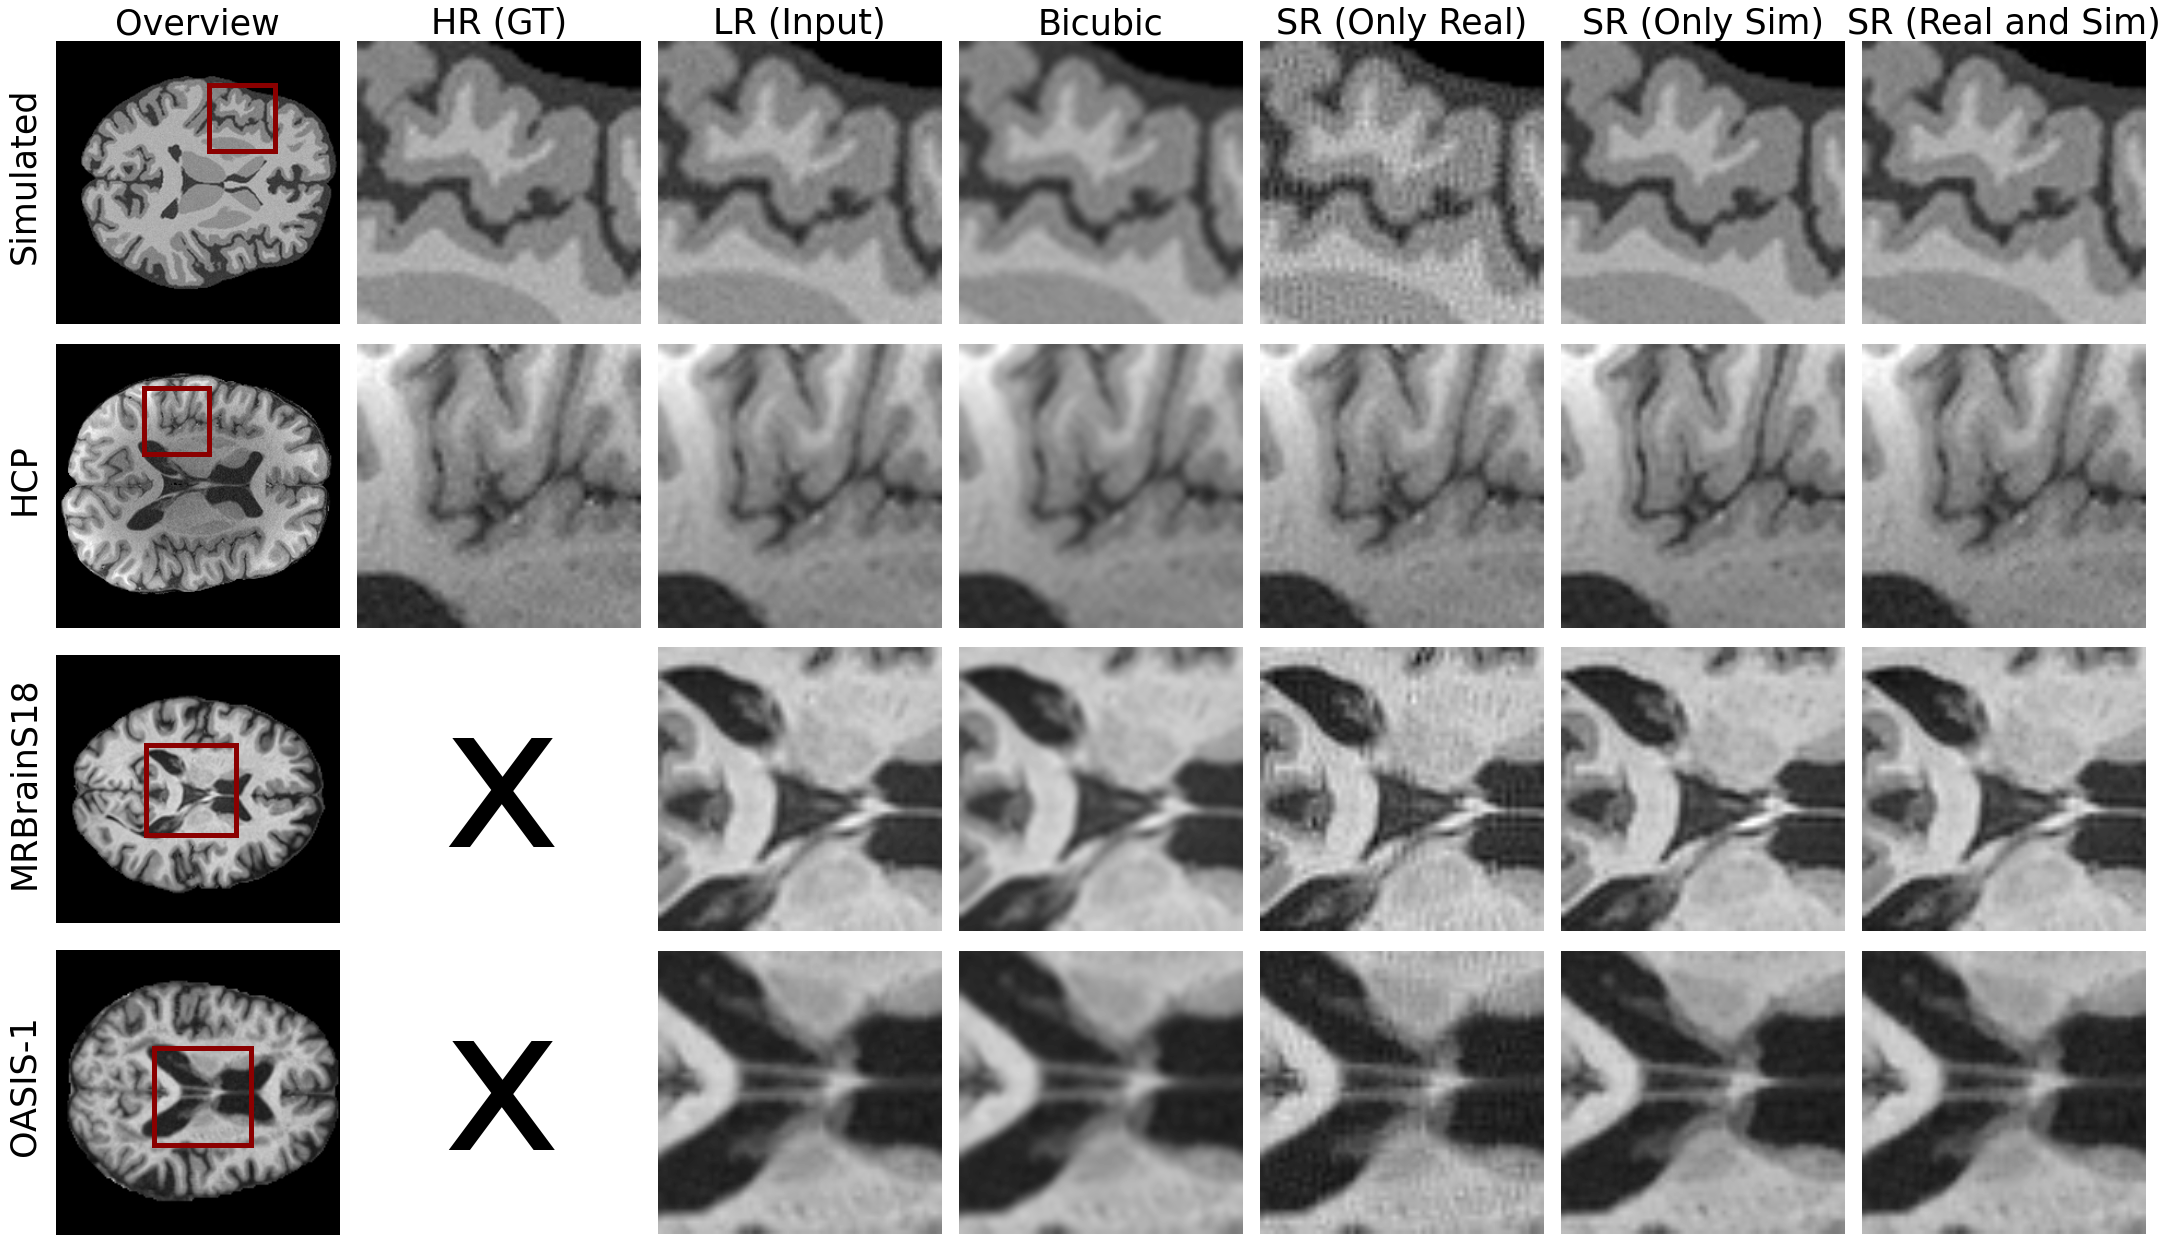

In [126]:
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(30, 17.5), gridspec_kw={'width_ratios': [0.05, 1, 1, 1, 1, 1, 1, 1]})
for axis in axes:
    for xs in axis:
        xs.set_axis_off()

fontsize = 35

x3_sim, x4_sim, y3_sim, y4_sim = 140, 200, 40, 100
x3_hcp, x4_hcp, y3_hcp, y4_hcp = 80, 140, 40, 100
x1_mrb, x2_mrb, y1_mrb, y2_mrb = 60, 120, 60, 120
x1_oas, x2_oas, y1_oas, y2_oas = 60, 120, 60, 120
rect1 = patches.Rectangle((x3_sim, y3_sim), 60, 60, linewidth=5, edgecolor='darkred', facecolor='none')
rect3 = patches.Rectangle((x3_hcp, y3_hcp), 60, 60, linewidth=5, edgecolor='darkred', facecolor='none')
rect4 = patches.Rectangle((x1_mrb, y1_mrb), 60, 60, linewidth=5, edgecolor='darkred', facecolor='none')
rect6 = patches.Rectangle((x1_oas, y1_oas), 60, 60, linewidth=5, edgecolor='darkred', facecolor='none')

axes[0,1].set_title('Overview', fontsize=fontsize)
axes[0,1].set_ylabel('Simulated', fontsize=fontsize)
axes[0,1].imshow(sim_HR, interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,1].set_ylabel('HCP', fontsize=fontsize)
axes[1,1].imshow(hcp_HR, interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[2,1].set_ylabel('MRBrainS18', fontsize=fontsize)
axes[2,1].imshow(mrbrains_lr, interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[3,1].set_ylabel('OASISImage', fontsize=fontsize)
axes[3,1].imshow(oasis_lr, interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[0,1].add_patch(rect1)
axes[1,1].add_patch(rect3)
axes[2,1].add_patch(rect4)
axes[3,1].add_patch(rect6)

axes[0,2].set_title('HR (GT)', fontsize=fontsize)
axes[0,2].imshow(sim_HR[y3_sim:y4_sim,x3_sim:x4_sim], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,2].imshow(hcp_HR[y3_hcp:y4_hcp,x3_hcp:x4_hcp], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[2,2].imshow(np.ones((y2_hcp-y1_hcp,x2_hcp-x1_hcp)), interpolation='bilinear', cmap='gray', vmin=0, vmax=1, alpha=0)
axes[3,2].imshow(np.ones((y2_hcp-y1_hcp,x2_hcp-x1_hcp)), interpolation='bilinear', cmap='gray', vmin=0, vmax=1, alpha=0)

axes[0,3].set_title('LR (Input)', fontsize=fontsize)
axes[0,3].imshow(sim_LR[y3_sim:y4_sim,x3_sim:x4_sim], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,3].imshow(hcp_LR[y3_hcp:y4_hcp,x3_hcp:x4_hcp], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[2,3].imshow(mrbrains_lr[y1_mrb:y2_mrb,x1_mrb:x2_mrb], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[3,3].imshow(oasis_lr[y1_oas:y2_oas,x1_oas:x2_oas], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)

axes[0,4].set_title('Bicubic', fontsize=fontsize)
axes[0,4].imshow(sim_LR[y3_sim:y4_sim,x3_sim:x4_sim], interpolation='bicubic', cmap='gray', vmin=0, vmax=1.5)
axes[1,4].imshow(hcp_LR[y3_hcp:y4_hcp,x3_hcp:x4_hcp], interpolation='bicubic', cmap='gray', vmin=0, vmax=1.5)
axes[2,4].imshow(mrbrains_lr[y1_mrb:y2_mrb,x1_mrb:x2_mrb], interpolation='bicubic', cmap='gray', vmin=0, vmax=1.5)
axes[3,4].imshow(oasis_lr[y1_oas:y2_oas,x1_oas:x2_oas], interpolation='bicubic', cmap='gray', vmin=0, vmax=1.5)

axes[0,5].set_title('SR (Only Real)', fontsize=fontsize)
axes[0,5].imshow(sim_hcp[y3_sim:y4_sim,x3_sim:x4_sim], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,5].imshow(hcp_hcp[y3_hcp:y4_hcp,x3_hcp:x4_hcp], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[2,5].imshow(mrbrains_hcp[y1_mrb:y2_mrb,x1_mrb:x2_mrb], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[3,5].imshow(oasis_hcp[y1_oas:y2_oas,x1_oas:x2_oas], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)

axes[0,6].set_title('SR (Only Sim)', fontsize=fontsize)
axes[0,6].imshow(sim_sim[y3_sim:y4_sim,x3_sim:x4_sim], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,6].imshow(hcp_sim[y3_hcp:y4_hcp,x3_hcp:x4_hcp], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[2,6].imshow(mrbrains_sim[y1_mrb:y2_mrb,x1_mrb:x2_mrb], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[3,6].imshow(oasis_sim[y1_oas:y2_oas,x1_oas:x2_oas], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)

axes[0,7].set_title('SR (Real and Sim)', fontsize=fontsize)
axes[0,7].imshow(sim_mix[y3_sim:y4_sim,x3_sim:x4_sim], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[1,7].imshow(hcp_mix[y3_hcp:y4_hcp,x3_hcp:x4_hcp], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[2,7].imshow(mrbrains_mix[y1_mrb:y2_mrb,x1_mrb:x2_mrb], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)
axes[3,7].imshow(oasis_mix[y1_oas:y2_oas,x1_oas:x2_oas], interpolation='bilinear', cmap='gray', vmin=0, vmax=1.5)

axes[2,2].text(30, 30, "x", size=200,
         ha="center", va="center", fontweight='ultralight',
               )
axes[3,2].text(30, 30, "x", size=200,
         ha="center", va="center", fontweight='ultralight',
               )

axes[0,0].imshow(np.ones((100,100)),cmap='gray', vmin=0, vmax=1, alpha=0)
axes[1,0].imshow(np.ones((100,100)),cmap='gray', vmin=0, vmax=1, alpha=0)
axes[2,0].imshow(np.ones((100,100)),cmap='gray', vmin=0, vmax=1, alpha=0)
axes[3,0].imshow(np.ones((100,100)),cmap='gray', vmin=0, vmax=1, alpha=0)
axes[0,0].text(0, 0, "Simulated", size=fontsize,
         ha="center", va="center", rotation='vertical'
               )
axes[1,0].text(0, 0, "HCP", size=fontsize,
         ha="center", va="center", rotation='vertical'
               )
axes[2,0].text(0, 0, "MRBrainS18", size=fontsize,
         ha="center", va="center", rotation='vertical'
               )
axes[3,0].text(0, 0, "OASIS-1", size=fontsize,
         ha="center", va="center", rotation='vertical'
               )

plt.tight_layout()
path = 'figs'
name = 'results_exp2_aymen'
fig.savefig(os.path.join(path, 'png', name+'.png'), dpi=300, bbox_inches='tight')
fig.savefig(os.path.join(path, 'eps', name+'.eps'), format='eps', bbox_inches='tight')
plt.show()